In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%qtconsole

In [2]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import logging
logging.basicConfig(level=logging.INFO)

In [5]:
from loren_frank_data_processing import get_interpolated_position_dataframe
from src.parameters import ANIMALS

epoch_key = ('bon', 4, 2)

position_info = get_interpolated_position_dataframe(epoch_key, ANIMALS)

In [7]:
from src.parameters import SAMPLING_FREQUENCY
from src.analysis import identify_replays, get_replay_times

results_spikes, detector_spikes = identify_replays(
    epoch_key, ANIMALS, SAMPLING_FREQUENCY,
    use_likelihoods=['spikes'], replay_speed=33,
    position_info=position_info)

INFO:replay_identification.decoders:Fitting speed model...
INFO:replay_identification.decoders:Fitting spiking model...
neurons: 100%|██████████| 34/34 [01:16<00:00,  2.26s/it]
INFO:replay_identification.decoders:Fitting movement state transition...
INFO:replay_identification.decoders:Fitting replay state transition...
INFO:replay_identification.decoders:Predicting spikes likelihood...
100%|██████████| 34/34 [01:49<00:00,  2.68s/it]
INFO:replay_identification.decoders:Predicting replay probability and density...


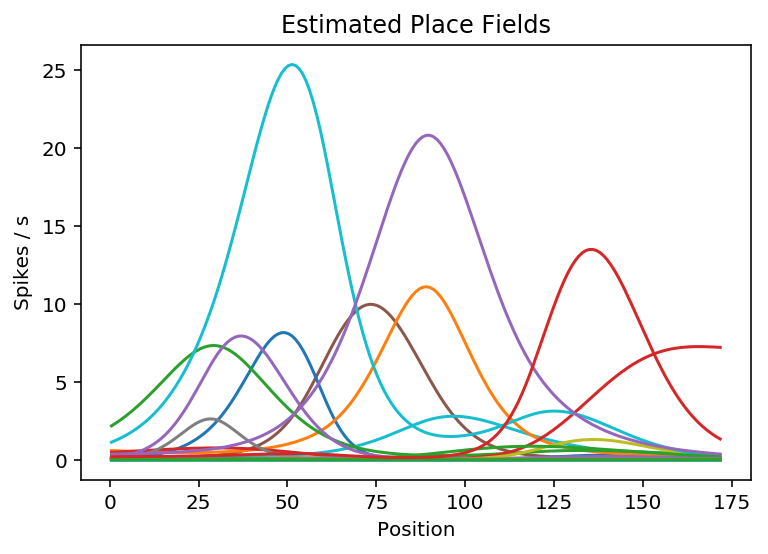

In [8]:
detector_spikes.plot_fitted_place_fields(sampling_frequency=SAMPLING_FREQUENCY)

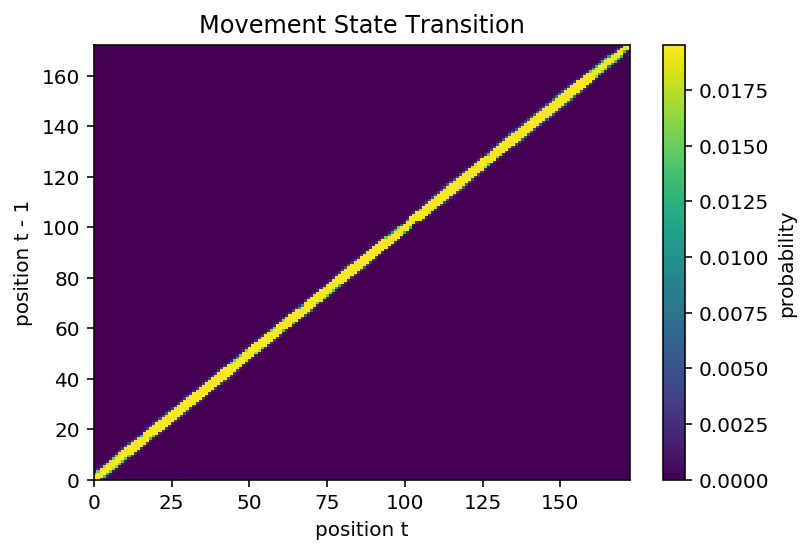

In [9]:
detector_spikes.plot_movement_state_transition()

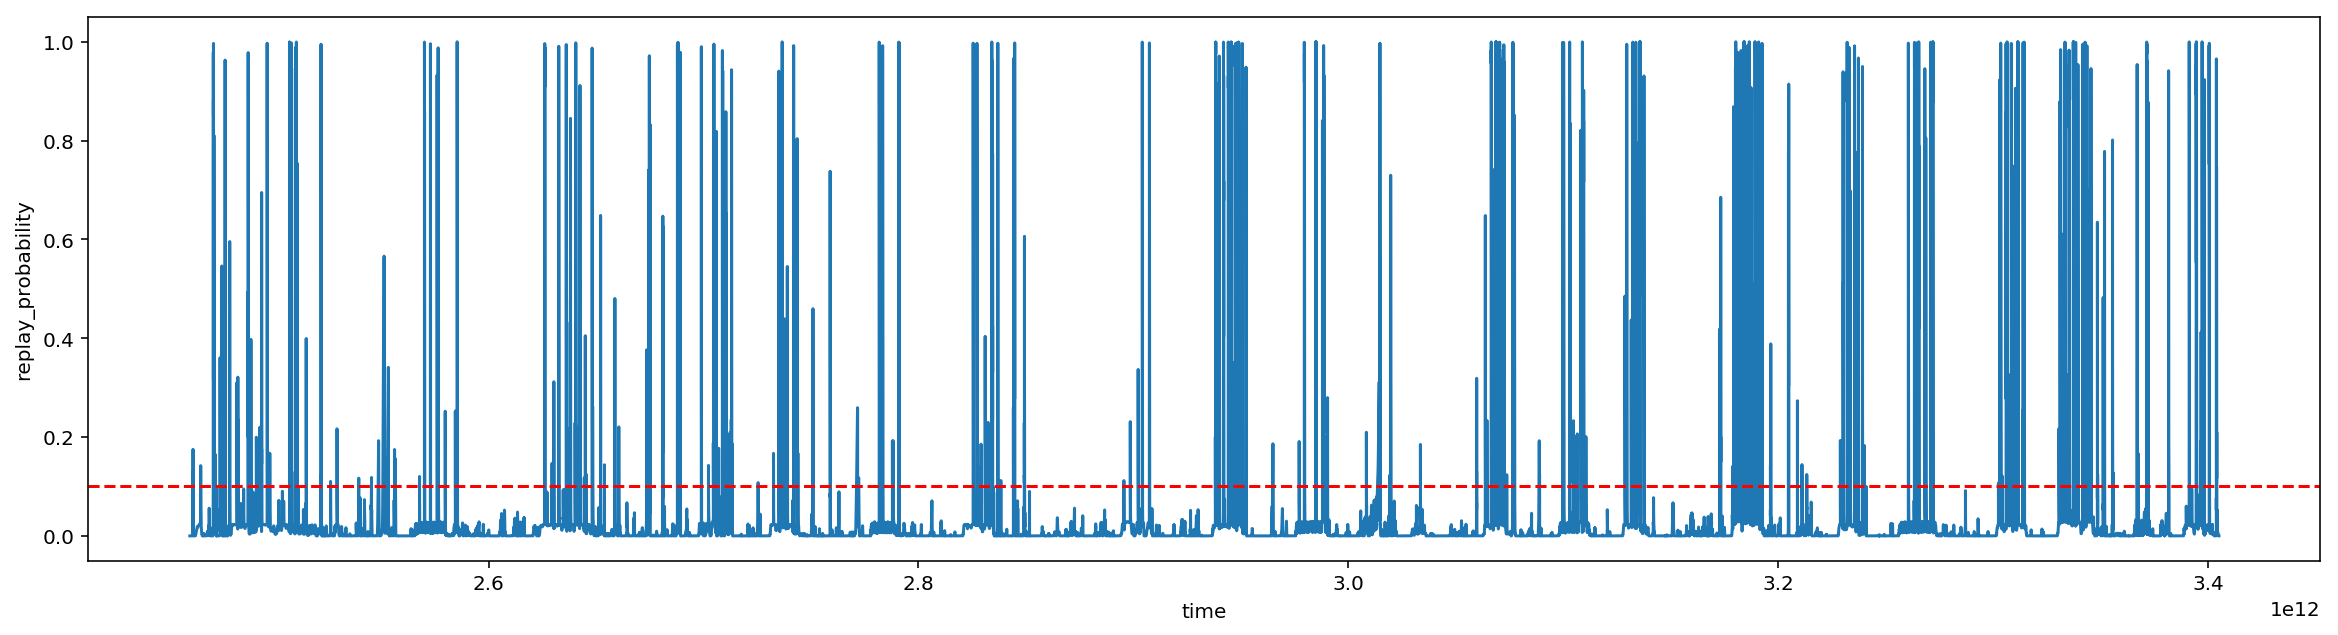

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))

results_spikes.replay_probability.plot(ax=ax)
ax.axhline(0.1, linestyle='--', color='red');

In [10]:
from src.analysis import get_replay_times

replay_times_spikes, _ = get_replay_times(results_spikes, 0.1)

In [11]:
import scipy.ndimage
from ipywidgets import interact

time_slices = scipy.ndimage.find_objects(*scipy.ndimage.label(results_spikes.replay_probability > 0.8))
is_nan_position = np.isnan(position_info.linear_distance)

def plot_time_slice(time_slice_ind):
    try:
        plt.figure()
        index = time_slices[time_slice_ind][0]
        r = results_spikes.assign_coords(time=results_spikes.time / np.timedelta64(1, 's'))
        g = r.replay_posterior.isel(time=index).plot(x='time', y='position', robust=True, vmin=0.0)
        p = position_info[~is_nan_position].iloc[index]
        g.axes.plot(p.index.total_seconds().values, p.linear_distance.values,
                    linestyle='--', color='white', linewidth=3)
    except ValueError:
        pass

interact(plot_time_slice, time_slice_ind=(0, len(time_slices)-1))

interactive(children=(IntSlider(value=125, description='time_slice_ind', max=251), Output()), _dom_classes=('w…

<function __main__.plot_time_slice(time_slice_ind)>

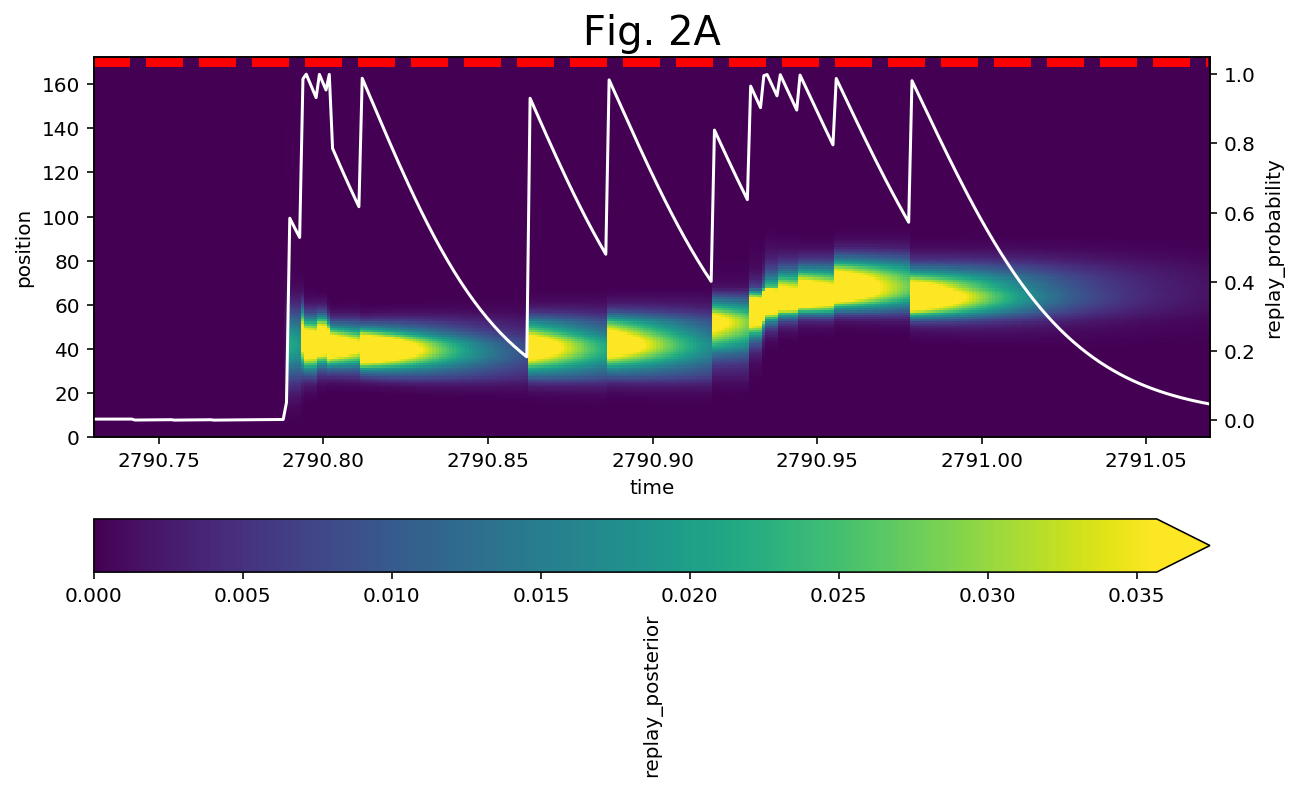

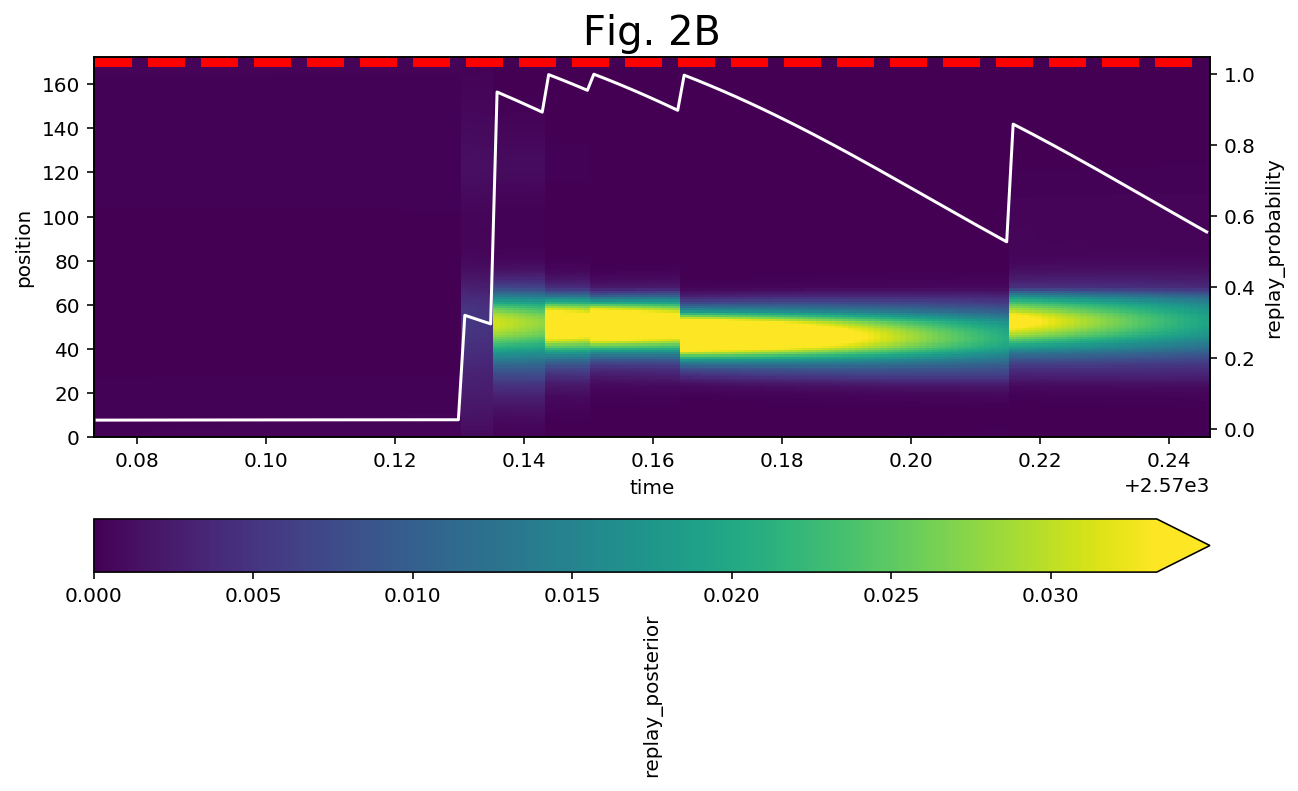

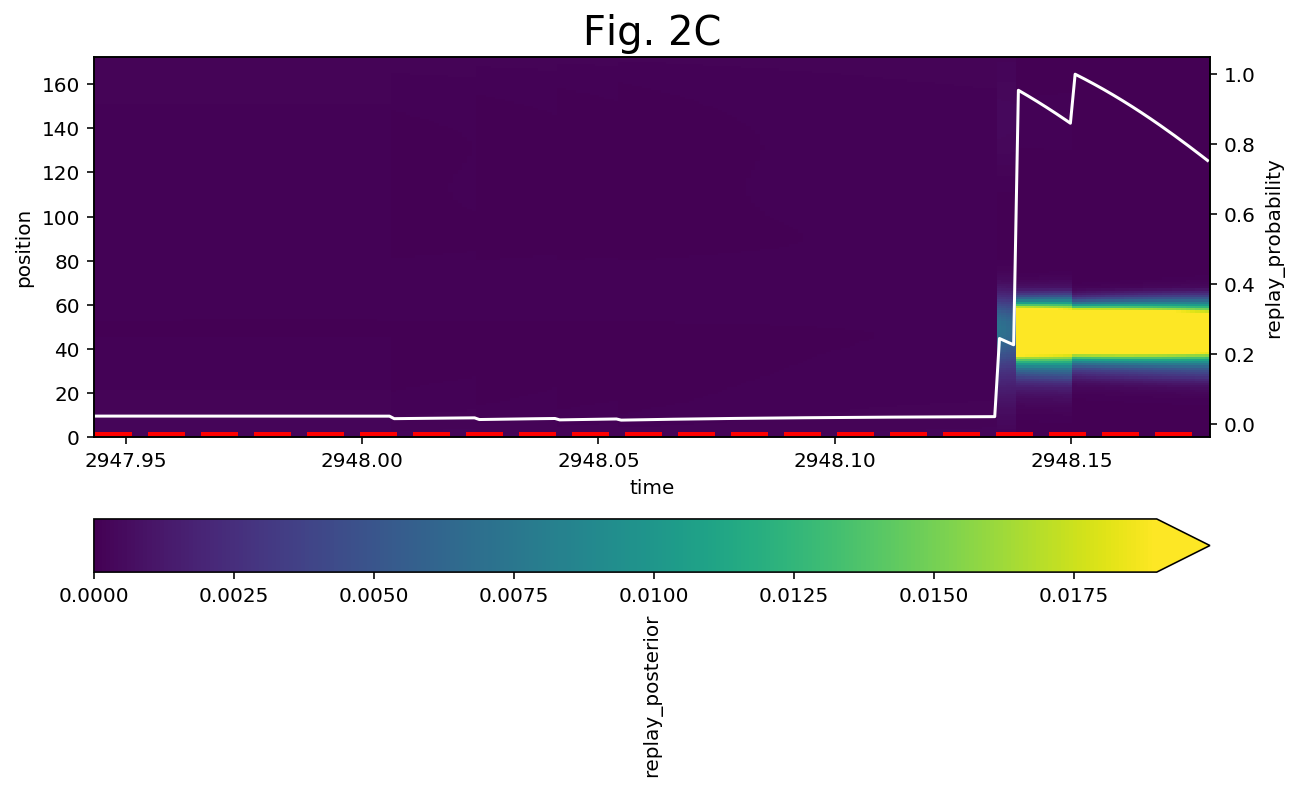

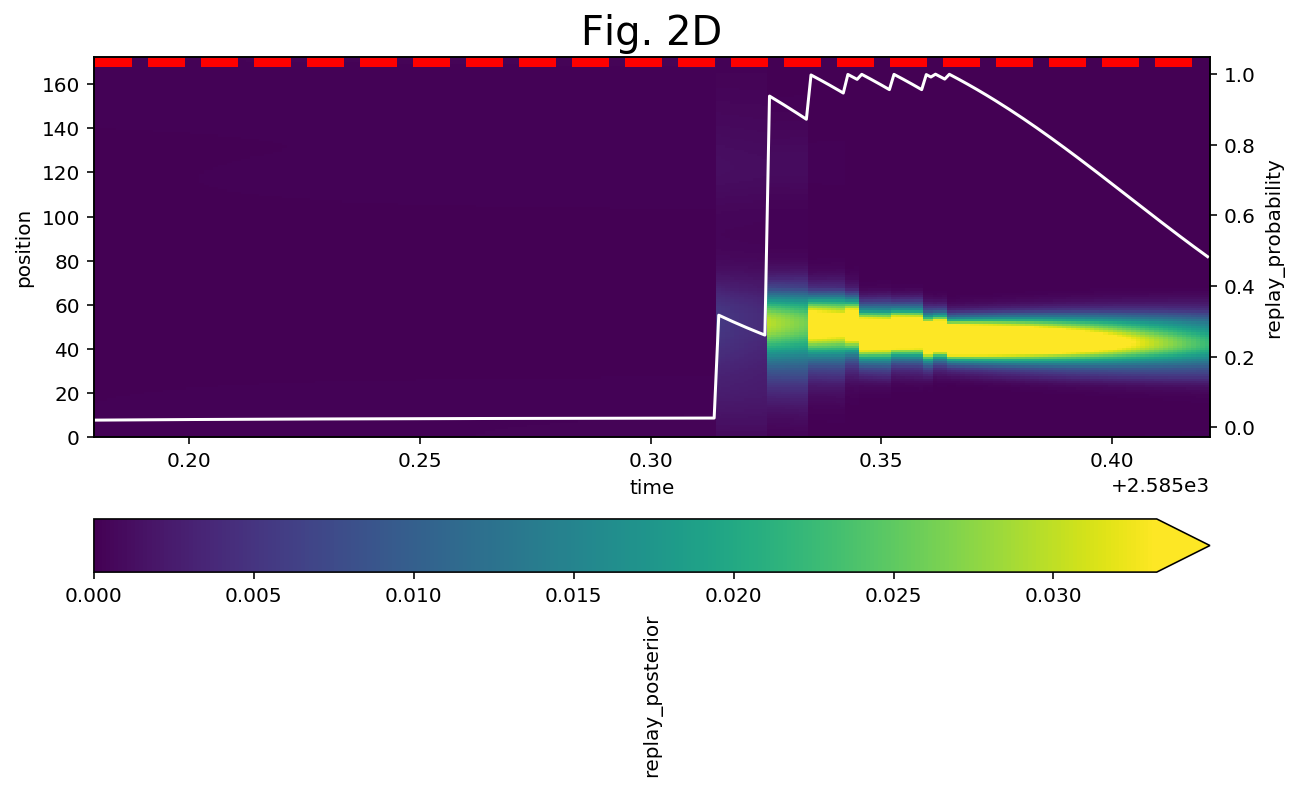

In [23]:
deng_names = ['Fig. 2A', 'Fig. 2B', 'Fig. 2C', 'Fig. 2D']
deng_times = [slice(2790.730, 2791.069), slice(2570.073, 2570.246),
              slice(2947.943, 2948.179), slice(2585.179, 2585.421)]

for t, fig_name in zip(deng_times, deng_names):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    r = results_spikes.assign_coords(time=results_spikes.time / np.timedelta64(1, 's')).sel(time=t)
    g = r.replay_posterior.plot(
        x='time', y='position', cbar_kwargs=dict(orientation='horizontal'),
        robust=True, vmin=0.0, ax=ax)
    r.replay_probability.plot(ax=ax.twinx(), color='white')
    p = position_info.set_index(position_info.index.total_seconds()).loc[t]
    ax.plot(p.index.values, p.linear_distance.values,
            color='red', linestyle='--', linewidth=5)
    ax.set_title(fig_name, fontsize=20)

In [37]:
from src.parameters import ANIMALS, SAMPLING_FREQUENCY
from src.analysis import identify_replays, get_replay_times

epoch_key = ('bon', 4, 2)

results_multiunit, detector_multiunit = identify_replays(
    epoch_key, ANIMALS, SAMPLING_FREQUENCY,
    use_likelihoods=['multiunit'])

INFO:replay_identification.decoders:Fitting speed model...
INFO:replay_identification.decoders:Fitting multiunit model...


electrodes:   0%|          | 0/18 [00:00<?, ?it/s]

electrodes:   6%|▌         | 1/18 [00:14<04:03, 14.31s/it]

electrodes:  11%|█         | 2/18 [00:16<02:09,  8.11s/it]

electrodes:  17%|█▋        | 3/18 [00:23<01:58,  7.91s/it]

electrodes:  22%|██▏       | 4/18 [00:34<01:59,  8.54s/it]

electrodes:  28%|██▊       | 5/18 [00:39<01:43,  7.96s/it]

electrodes:  33%|███▎      | 6/18 [00:41<01:23,  6.94s/it]

electrodes:  39%|███▉      | 7/18 [01:18<02:04, 11.28s/it]

electrodes:  44%|████▍     | 8/18 [01:22<01:43, 10.35s/it]

electrodes:  50%|█████     | 9/18 [01:39<01:39, 11.07s/it]

electrodes:  56%|█████▌    | 10/18 [02:16<01:48, 13.61s/it]

electrodes:  61%|██████    | 11/18 [02:22<01:30, 12.97s/it]

electrodes:  67%|██████▋   | 12/18 [02:34<01:17, 12.86s/it]

electrodes:  72%|███████▏  | 13/18 [02:46<01:03, 12.80s/it]

electrodes:  78%|███████▊  | 14/18 [02:4

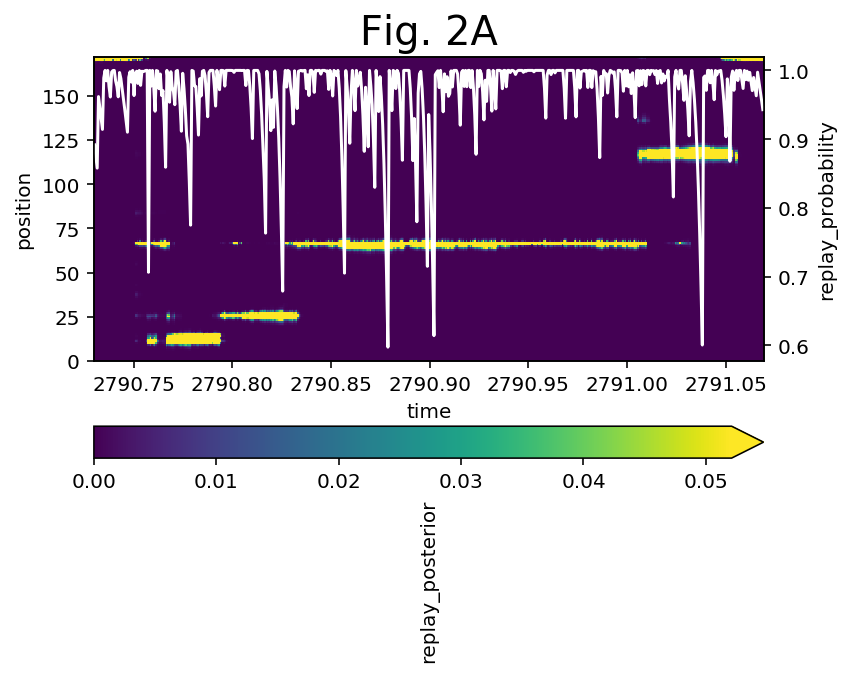

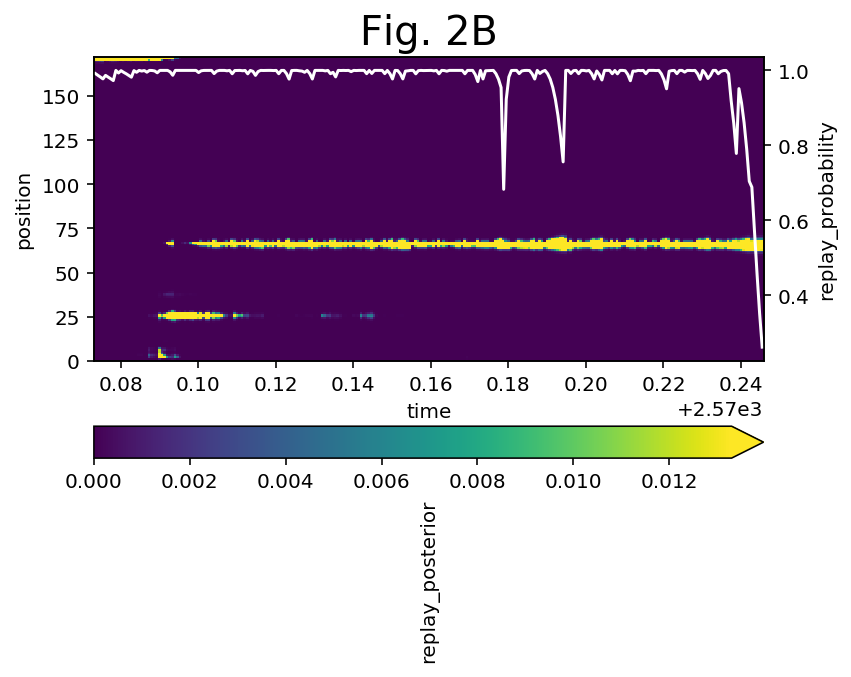

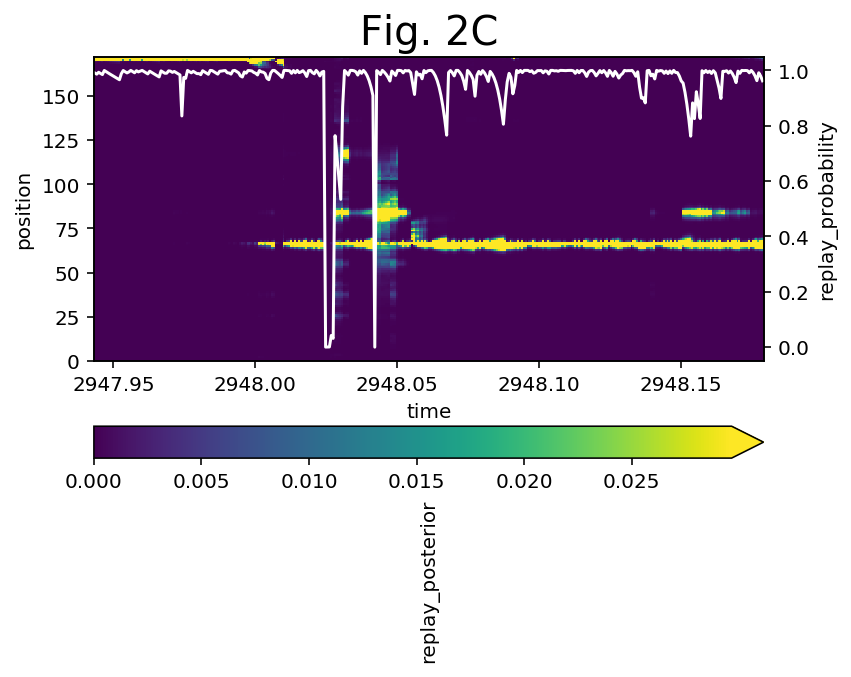

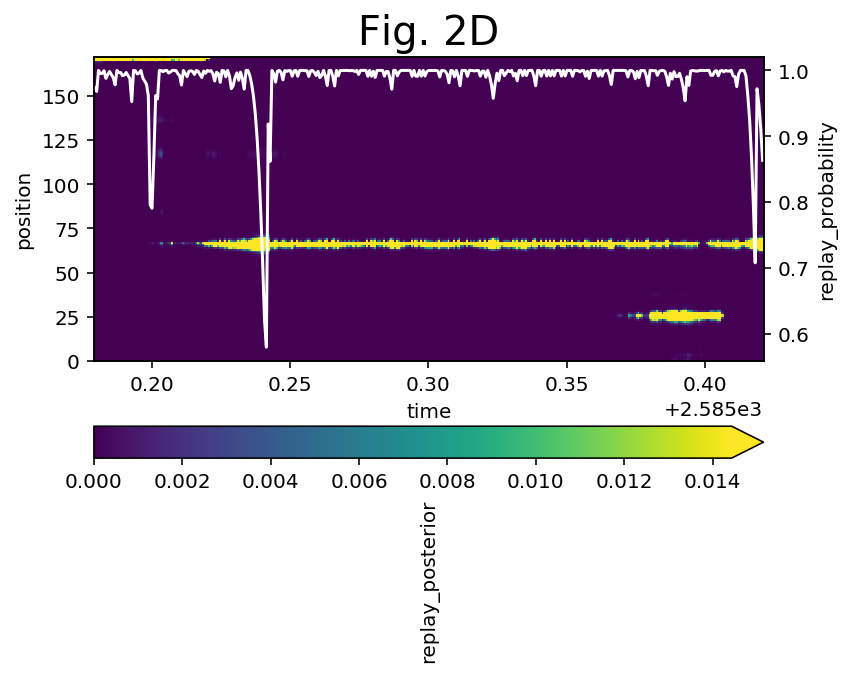

In [39]:
deng_names = ['Fig. 2A', 'Fig. 2B', 'Fig. 2C', 'Fig. 2D']
deng_times = [slice(2790.730, 2791.069), slice(2570.073, 2570.246),
              slice(2947.943, 2948.179), slice(2585.179, 2585.421)]

for t, fig_name in zip(deng_times, deng_names):
    plt.figure()
    r = results_multiunit.assign_coords(time=results_multiunit.time / np.timedelta64(1, 's')).sel(time=t)
    g = r.replay_posterior.plot(x='time', y='position', cbar_kwargs=dict(orientation='horizontal'),
                                robust=True, vmin=0.0)
    r.replay_probability.plot(ax=g.axes.twinx(), color='white')
    plt.title(fig_name, fontsize=20)

In [195]:
posterior = []
replay_position = []
current_position = []

for replay_number, start_time, end_time in replay_times.itertuples(True, None):
    p = results.sel(time=slice(start_time, end_time)).replay_posterior.values
    posterior.append(p)
    replay_position.append(results.position[np.argmax(p, axis=1)].values)
    current_position.append(position_info.loc[start_time:end_time].linear_distance.values)
    


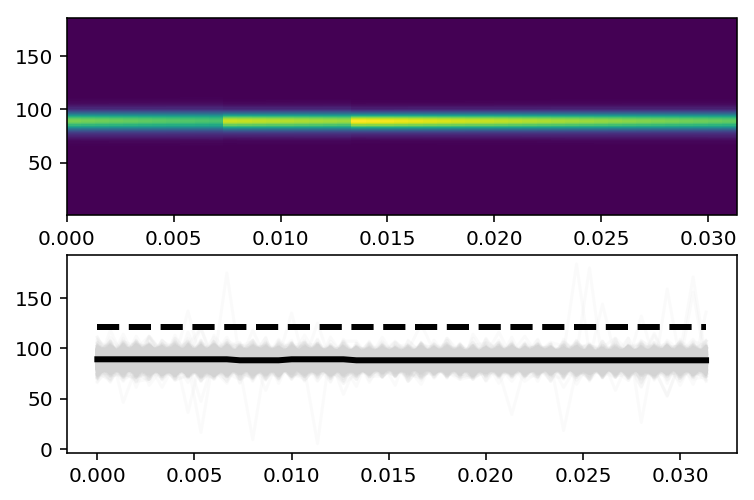

In [213]:
from src.analysis import generate_samples_from_posterior

ind = -6

n_time = posterior[ind].shape[0]
t = np.arange(n_time) / SAMPLING_FREQUENCY
p = results.position.values

t, p = np.meshgrid(t, p)

fig, axes = plt.subplots(2, 1)
axes[0].pcolormesh(t, p, posterior[ind].T)
samples = results.position.values[generate_samples_from_posterior(posterior[ind], 1000)]

t = np.arange(n_time) / SAMPLING_FREQUENCY
axes[1].plot(t, samples, color='lightgrey', alpha=0.1);
axes[1].plot(t, replay_position[ind], linewidth=3, color='black');
axes[1].plot(t, current_position[ind], linewidth=3, color='black', linestyle='--');

In [2]:
from sklearn.base import BaseEstimator
from functools import partial

import numpy as np
from numba import jit
from scipy.special import logsumexp

@jit(nogil=True, nopython=True, cache=True)
def _normal_pdf(x, mean=0, std_deviation=1):
    '''Evaluate the normal probability density function at specified points.
    Unlike the `scipy.stats.norm.pdf`, this function is not general and does
    not do any sanity checking of the inputs. As a result it is a much faster
    function, but you should be sure of your inputs before using.
    This function only computes the one-dimensional pdf.
    Parameters
    ----------
    x : array_like
        The normal probability function will be evaluated
    mean : float or array_like, optional
    std_deviation : float or array_like
    Returns
    -------
    probability_density
        The normal probability density function evaluated at `x`
    '''
    return np.exp(-0.5 * ((x - mean) / std_deviation) ** 2) / (np.sqrt(2.0 * np.pi) * std_deviation)


def _log_isotropic_kde(x, mean, std_deviation):
    n_samples, n_features = x.shape
    x, mean = x[:, np.newaxis, :], mean[np.newaxis, ...]
    kde = np.sum(logsumexp(-0.5 * ((x - mean) / std_deviation) ** 2, axis=1), axis=1)
    kde -= n_features * (np.log(n_samples) + np.log(np.sqrt(2.0 * np.pi)))
    kde -= np.sum(np.log(std_deviation))
    return kde


class KernelDensity2(BaseEstimator):
    def __init__(self, bandwidth):
        self.bandwidth = np.array(bandwidth)

    def fit(self, X, y=None):
        """Fit the Kernel Density model on the data.
        
        Parameters
        ----------
        X : array_like, shape (n_samples, n_features)
            List of n_features-dimensional data points.  Each row
            corresponds to a single data point.
        """
        self.training_data = X
        
        return self
    
    def score_samples(self, X):
        """Evaluate the density model on the data.
        
        Parameters
        ----------
        X : array_like, shape (n_samples, n_features)
            An array of points to query.  Last dimension should match dimension
            of training data (n_features).

        Returns
        -------
        density : ndarray, shape (n_samples,)
            The array of log(density) evaluations.
        """
        return np.log(np.mean(np.prod(_normal_pdf(
            X[:, np.newaxis, :], mean=self.training_data[np.newaxis, ...],
            std_deviation=self.bandwidth), axis=2), axis=1))

    def score(self, X, y=None):
        """Compute the total log probability under the model.
        
        Parameters
        ----------
        X : array_like, shape (n_samples, n_features)
            List of n_features-dimensional data points.  Each row
            corresponds to a single data point.

        Returns
        -------
        logprob : float
            Total log-likelihood of the data in X.
        """
        return np.sum(self.score_samples(X))
    
    def sample(self, n_samples=1, random_state=None):
        """Generate random samples from the model.
        
        Currently, this is implemented only for gaussian and tophat kernels.

        Parameters
        ----------
        n_samples : int, optional
            Number of samples to generate. Defaults to 1.
        random_state : int, RandomState instance or None. default to None
            If int, random_state is the seed used by the random number
            generator; If RandomState instance, random_state is the random
            number generator; If None, the random number generator is the
            RandomState instance used by `np.random`.
            
        Returns
        -------
        X : array_like, shape (n_samples, n_features)
            List of samples.
        """
        raise NotImplementedError()

    
class KernelDensity3(BaseEstimator):
    def __init__(self, bandwidth):
        self.bandwidth = np.array(bandwidth)

    def fit(self, X, y=None):
        """Fit the Kernel Density model on the data.
        
        Parameters
        ----------
        X : array_like, shape (n_samples, n_features)
            List of n_features-dimensional data points.  Each row
            corresponds to a single data point.
        """
        self.training_data = X
        
        return self
    
    def score_samples(self, X):
        """Evaluate the density model on the data.
        
        Parameters
        ----------
        X : array_like, shape (n_samples, n_features)
            An array of points to query.  Last dimension should match dimension
            of training data (n_features).

        Returns
        -------
        density : ndarray, shape (n_samples,)
            The array of log(density) evaluations.
        """
        return _log_isotropic_kde(X, self.training_data, self.bandwidth)

    def score(self, X, y=None):
        """Compute the total log probability under the model.
        
        Parameters
        ----------
        X : array_like, shape (n_samples, n_features)
            List of n_features-dimensional data points.  Each row
            corresponds to a single data point.

        Returns
        -------
        logprob : float
            Total log-likelihood of the data in X.
        """
        return np.sum(self.score_samples(X))
    
    def sample(self, n_samples=1, random_state=None):
        """Generate random samples from the model.
        
        Currently, this is implemented only for gaussian and tophat kernels.

        Parameters
        ----------
        n_samples : int, optional
            Number of samples to generate. Defaults to 1.
        random_state : int, RandomState instance or None. default to None
            If int, random_state is the seed used by the random number
            generator; If RandomState instance, random_state is the random
            number generator; If None, the random number generator is the
            RandomState instance used by `np.random`.
            
        Returns
        -------
        X : array_like, shape (n_samples, n_features)
            List of samples.
        """
        raise NotImplementedError()

/Users/edeno/miniconda3/envs/Replay_ID_2018/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
N = 2000
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
test = np.linspace(-5, 10, 1000)[:, np.newaxis]

True

False

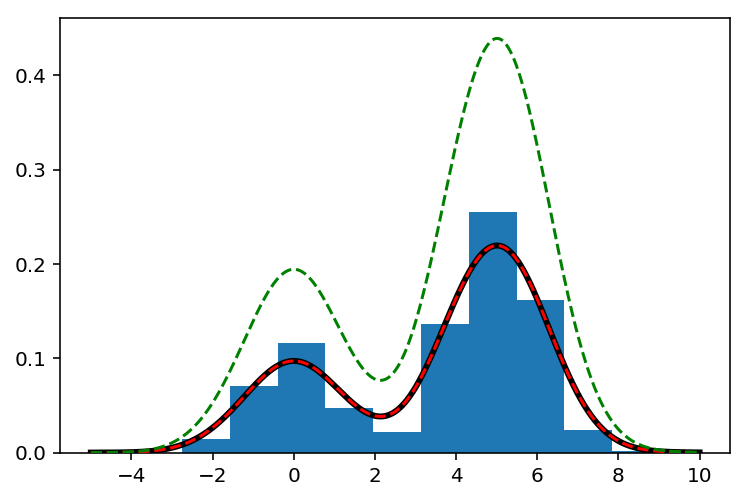

In [6]:
from sklearn.neighbors import KernelDensity

bandwidth = 0.75

fig, ax = plt.subplots(1,1)
ax.hist(X, density=True);

kde = KernelDensity(bandwidth=bandwidth).fit(X)
density = np.exp(kde.score_samples(test))
ax.plot(test, density, zorder=90, linewidth=3, color='black')

kde2 = KernelDensity2(bandwidth=np.array([bandwidth])).fit(X)
density2 = np.exp(kde2.score_samples(test))
ax.plot(test, density2, color='red', zorder=100, linestyle='--')
display(np.allclose(density, density2))

kde3 = KernelDensity3(bandwidth=np.array([bandwidth])).fit(X)
density3 = np.exp(kde3.score_samples(test))
ax.plot(test, density3, color='green', zorder=100, linestyle='--')
display(np.allclose(density, density3))

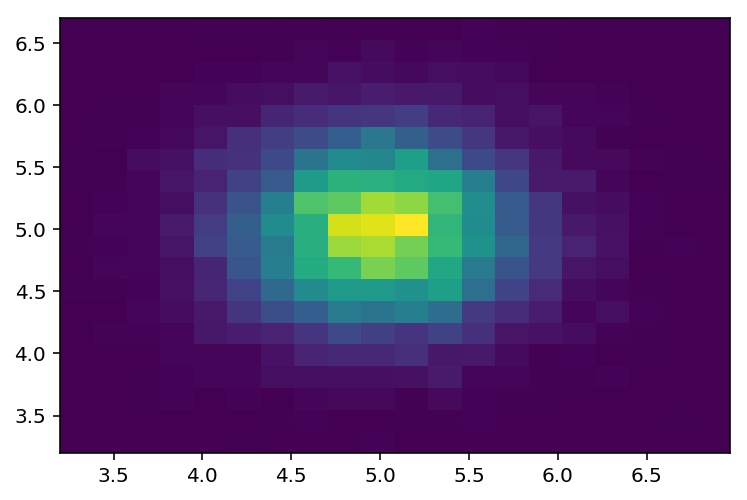

In [54]:
X = np.random.normal(size=(10000, 2), loc=5, scale=0.5)
plt.hist2d(X[:, 0], X[:, 1], bins=20, normed=True);

In [55]:
x1 = np.linspace(0, 10)
x2 = np.linspace(0, 10)

x1, x2 = np.meshgrid(x1, x2)
test = np.stack((x1.flat, x2.flat), axis=1)

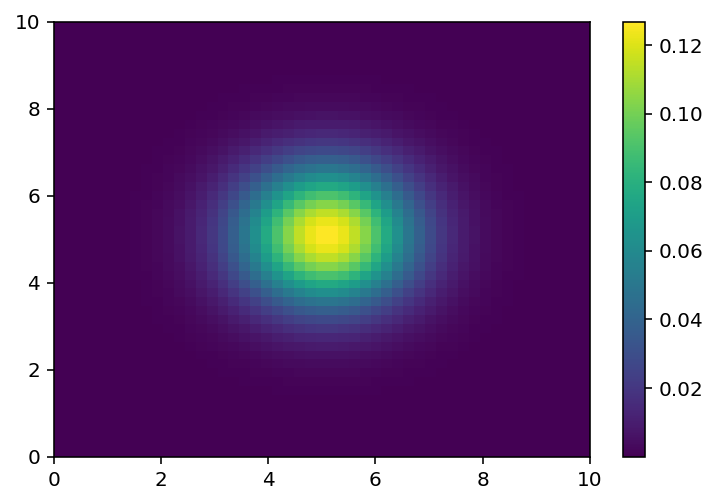

In [56]:
kde = KernelDensity(bandwidth=1).fit(X)
density = np.exp(kde.score_samples(test)).reshape((50, 50))
plt.pcolormesh(x1, x2, density)
plt.colorbar()

True

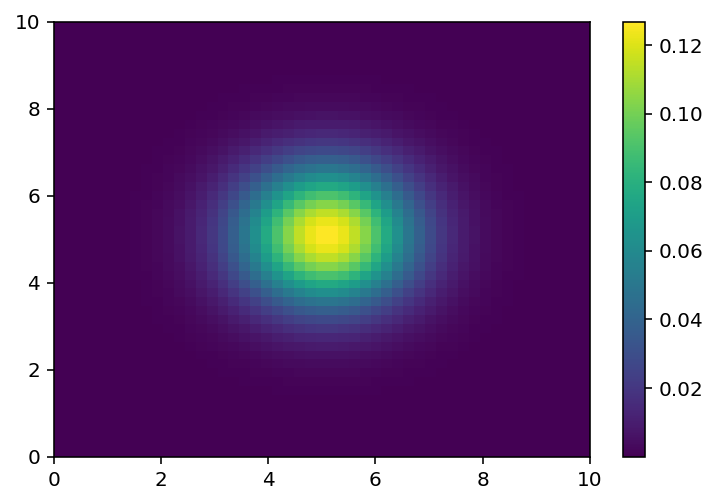

In [57]:
kde2 = KernelDensity2(bandwidth=np.array([1, 1])).fit(X)
density2 = np.exp(kde2.score_samples(test)).reshape((50, 50))
plt.pcolormesh(x1, x2, density2)
plt.colorbar()
np.allclose(density, density2)

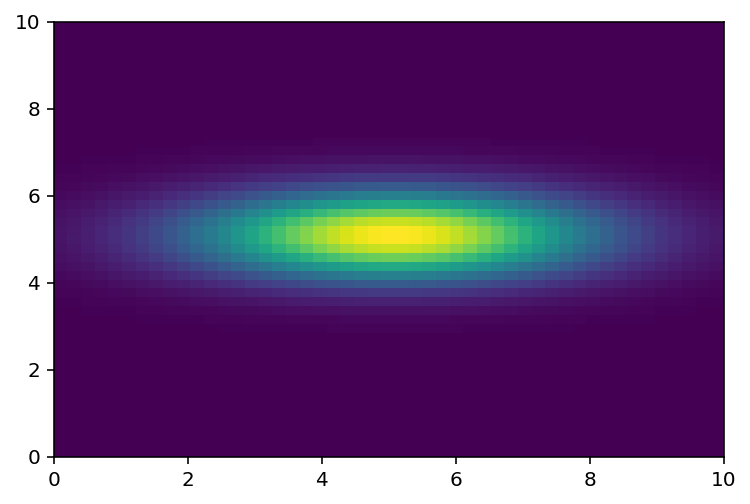

In [58]:
kde2 = KernelDensity2(bandwidth=np.array([2, 0.5])).fit(X)
plt.pcolormesh(x1, x2, np.exp(kde2.score_samples(test)).reshape((50, 50)))

In [7]:
from src.parameters import ANIMALS, SAMPLING_FREQUENCY
from src.analysis import identify_replays, get_replay_times

epoch_key = ('bon', 4, 2)

results_multiunit2, detector_multiunit2 = identify_replays(
    epoch_key, ANIMALS, SAMPLING_FREQUENCY,
    use_likelihoods=['multiunit'], 
    multiunit_density_model=KernelDensity2,
    multiunit_model_kwargs=dict(bandwidth=np.array([20, 20, 20, 20, 2.8]))
)

INFO:replay_identification.decoders:Fitting speed model...
INFO:replay_identification.decoders:Fitting multiunit model...
electrodes: 100%|██████████| 18/18 [00:04<00:00,  4.09it/s]
INFO:replay_identification.decoders:Fitting movement state transition...
INFO:replay_identification.decoders:Fitting replay state transition...
INFO:replay_identification.decoders:Predicting multiunit likelihood...
  0%|          | 0/18 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [49]:
import dask.array as da

class KernelDensity2_dask(BaseEstimator):
    def __init__(self, bandwidth):
        self.bandwidth = np.array(bandwidth)

    def fit(self, X, y=None):
        """Fit the Kernel Density model on the data.
        
        Parameters
        ----------
        X : array_like, shape (n_samples, n_features)
            List of n_features-dimensional data points.  Each row
            corresponds to a single data point.
        """
        self.training_data = da.from_array(X)
        
        return self
    
    def score_samples(self, X):
        """Evaluate the density model on the data.
        
        Parameters
        ----------
        X : array_like, shape (n_samples, n_features)
            An array of points to query.  Last dimension should match dimension
            of training data (n_features).

        Returns
        -------
        density : ndarray, shape (n_samples,)
            The array of log(density) evaluations.
        """
        
        return np.log(np.mean(np.prod(_normal_pdf(
            da.from_array(X[:, np.newaxis, :],
            mean=self.training_data[np.newaxis, ...],
            std_deviation=self.bandwidth), axis=2), axis=1))).compute()

    def score(self, X, y=None):
        """Compute the total log probability under the model.
        
        Parameters
        ----------
        X : array_like, shape (n_samples, n_features)
            List of n_features-dimensional data points.  Each row
            corresponds to a single data point.

        Returns
        -------
        logprob : float
            Total log-likelihood of the data in X.
        """
        return np.sum(self.score_samples(X))
    
    def sample(self, n_samples=1, random_state=None):
        """Generate random samples from the model.
        
        Currently, this is implemented only for gaussian and tophat kernels.

        Parameters
        ----------
        n_samples : int, optional
            Number of samples to generate. Defaults to 1.
        random_state : int, RandomState instance or None. default to None
            If int, random_state is the seed used by the random number
            generator; If RandomState instance, random_state is the random
            number generator; If None, the random number generator is the
            RandomState instance used by `np.random`.
            
        Returns
        -------
        X : array_like, shape (n_samples, n_features)
            List of samples.
        """
        raise NotImplementedError()


In [50]:
from src.parameters import ANIMALS, SAMPLING_FREQUENCY
from src.analysis import identify_replays, get_replay_times

epoch_key = ('bon', 4, 2)

results_multiunit2, detector_multiunit2 = identify_replays(
    epoch_key, ANIMALS, SAMPLING_FREQUENCY,
    use_likelihoods=['multiunit'], 
    multiunit_density_model=KernelDensity2_dask,
    multiunit_model_kwargs=dict(bandwidth=np.array([20, 20, 20, 20, 2.8]))
)

INFO:replay_identification.decoders:Fitting speed model...
INFO:replay_identification.decoders:Fitting multiunit model...


TypeError: from_array() missing 1 required positional argument: 'chunks'

In [3]:
from src.parameters import ANIMALS, SAMPLING_FREQUENCY
from src.analysis import identify_replays, get_replay_times

epoch_key = ('bon', 3, 2)

results_spikes, detector_spikes = identify_replays(
    epoch_key, ANIMALS, SAMPLING_FREQUENCY,
    use_likelihoods=['spikes'], replay_speed=33)

/Users/edeno/miniconda3/envs/Replay_ID_2018/lib/python3.6/site-packages/loren_frank_data_processing/tetrodes.py:87: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  for info, animal in tetrode_data
/Users/edeno/miniconda3/envs/Replay_ID_2018/lib/python3.6/site-packages/loren_frank_data_processing/well_traversal_classification.py:151: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  return (pd.DataFrame.from_items(data).set_index(index),
/Users/edeno/miniconda3/envs/Replay_ID_2018/lib/python3.6/site-packages/loren_frank_data_processing/neurons.py:39: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas wil

NameError: name 'position_info' is not defined

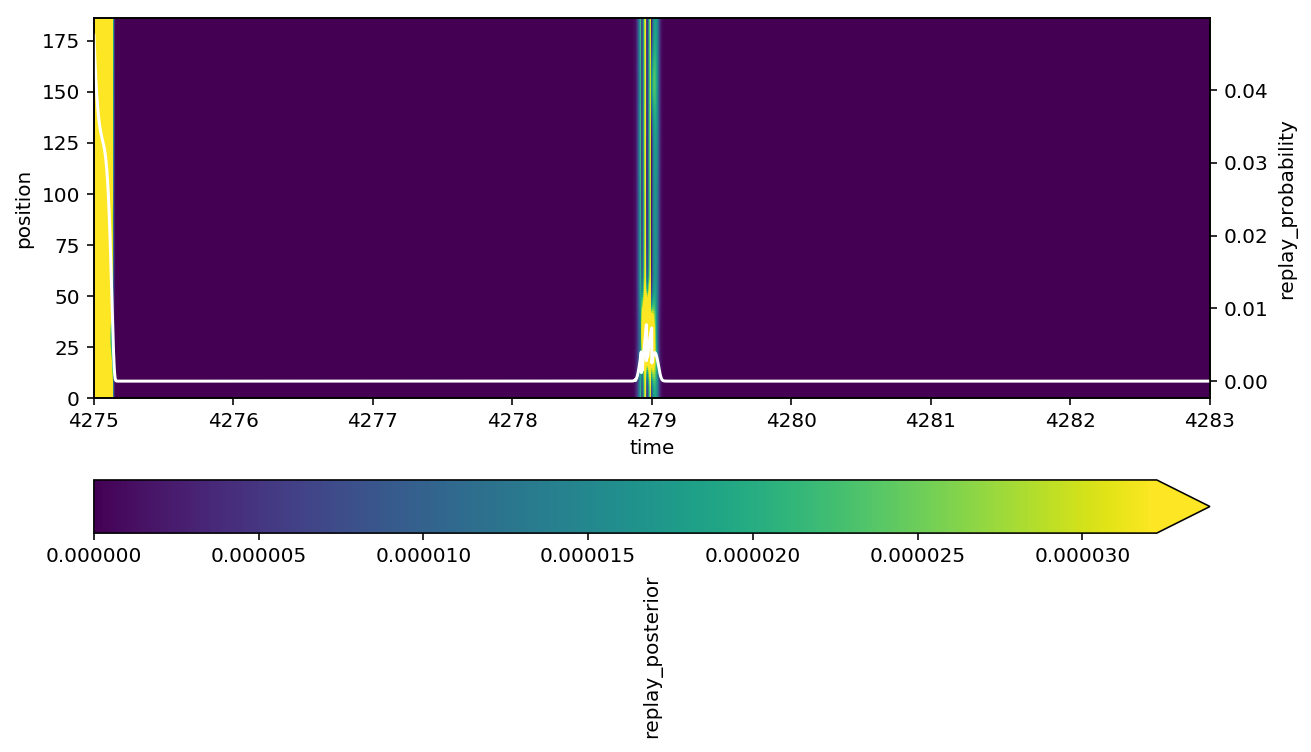

In [4]:
long_names = ['Fig. 6A', 'Fig. 6C']
long_times = [slice(4275, 4283), slice(4276.8, 4277)]

for t, fig_name in zip(long_times, long_names):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    r = results_spikes.assign_coords(time=results_spikes.time / np.timedelta64(1, 's')).sel(time=t)
    g = r.replay_posterior.plot(
        x='time', y='position', cbar_kwargs=dict(orientation='horizontal'),
        robust=True, vmin=0.0, ax=ax)
    r.replay_probability.plot(ax=ax.twinx(), color='white')
    p = position_info.set_index(position_info.index.total_seconds()).loc[t]
    ax.plot(p.index.values, p.linear_distance.values,
            color='red', linestyle='--', linewidth=5)
    ax.set_title(fig_name, fontsize=20)